In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta 
import os
import datetime
import json
import seaborn as sns
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbt as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from weekend import get_data,Strategy
sns.set_style("whitegrid")

/Users/johnsonhsiao/.pyenv/versions/3.10.13/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/johnsonhsiao/.pyenv/versions/3.10.13/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/johnsonhsiao/DC_capital_intern/strategy_research/CTA_TEST/Crypto/weekend/../../vectorbtpro/accessors.py:188: UserWarning: registration of accessor <class 'vectorbtpro.accessors.Vbt_SRAccessor'> under n

In [7]:
df_dict = {}
candidate = ['LTC','BTC','XRP','BCH'
            ,'BNB','SOL','MATIC',
            'XRP','DYDX','AVAX','LINK','GAS',
            'DOGE','ORDI','TRB','WLD','ADA',
            'OP','FIL','ZRX','LTC','RUNE','ATOM',
            'ARB','GMT','ETC','ARK','BCH','DOT',
            'LDO','SUI','GALA','CAKE',
            'APE','INJ','FTM','APT','YFI','OMG',
            'SEI','EOS','1000SHIB','NEAR',
            'MKR','CYBER','UNI',
            'BLUR','SUSHI','WAVES','MASK','MANA',
            'EGLD','AAVE','NEO','FET','TRX','GRT','ALGO','STX','XLM']
for coin in candidate:
    df_dict[coin] = get_data(coin)

In [5]:
# 假日時段：UTC+0 週五 22:00 - 週日 22:00

In [8]:
params_config = {
    "config": {
        "freq": "5min",
        "fee": 0.0003
    },
    "params": {
        "BTC": {
            "both": {
                "0": {
                    "window": 42.0
                },
                "1": {
                    "window": 78.0
                }
            }
        },
        "LTC": {
            "both": {
                "0": {
                    "window": 39.0
                },
                "1": {
                    "window": 69.0
                }
            }
        },
        "XRP": {
            "both": {
                "0": {
                    "window": 180.0
                },
                "1": {
                    "window": 237.0
                }
            }
        },
        "BCH": {
            "both": {
                "0": {
                    "window": 51.0
                },
                "1": {
                    "window": 72.0
                }
            }
        }
    }
}

In [9]:
params_config['params']

{'BTC': {'both': {'0': {'window': 42.0}, '1': {'window': 78.0}}},
 'LTC': {'both': {'0': {'window': 39.0}, '1': {'window': 69.0}}},
 'XRP': {'both': {'0': {'window': 180.0}, '1': {'window': 237.0}}},
 'BCH': {'both': {'0': {'window': 51.0}, '1': {'window': 72.0}}}}

APY: 47.26 %
MDD: 9.74 %
MDD Duration 76 days 17:10:00
worst trade: -5.15 %
2022-05-15 06:50:00 ~ 2022-05-15 22:00:00
avg holding days: 0.24 days
--------------------------------------------
PF: 1.61
Sharpe Ratio: 2.32
Calmar Ratio: 4.10
Sortino Ratio: 3.26
Omega Ratio: 1.05
--------------------------------------------
Expectancy : 0.12 %
Total Time Exposure : 26.31 %
Total Trades: 756
Win Rate: 70.11 %
--------------------------------------------
PF * Win Rate: 1.130


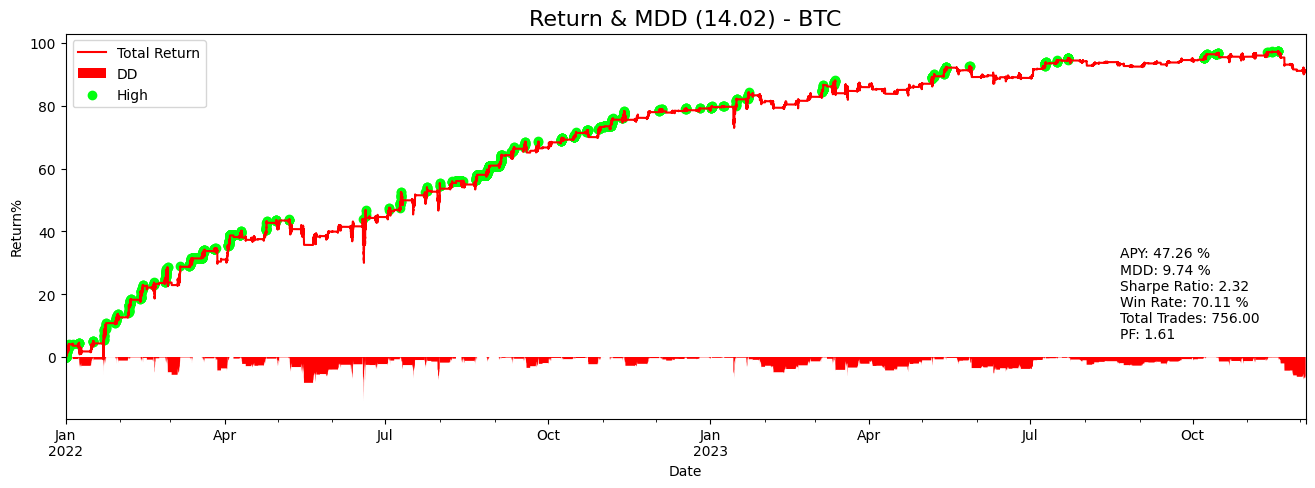

In [15]:
start = '2022-01-01'
sep = ''
end = ''

window = params_config['params']['BTC']['both']['0']['window']
side = 'both'
params = {'window': window, 'hour': 2}
config = {'freq':'5min', 'lag':1, 'fee': 0.0003}
coin = 'BTC'
df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
value = analyze.show_pf_analysis(params, side, coin, axv_index='')


In [5]:
start= '2022-01-01'
end ='2023-05-01'

params={
   'window': [12*1, 12*24, 3],
   'hour' : [1,8,1]
    }
    
config = {'freq':'15min','fee': 0.0003}
symbol_list = ['BTC']#,'ETH','LTC','XRP','BCH','AAVE']
sample_sets = [[start,end]]

multi_test = MultiTester(
    Strategy,
    get_data_func=get_data,
    params=params,
    config=config,
    df_dict=df_dict,
    symbol_list=symbol_list,
    start=start,
    end=end
    )

# multi_test.run(optimize=True,rolling=False,side_list=['L/S','both'],sep='2023-03-01')

======================= BTC LONG Optimize Test =======================
Optimization trails: 644


  0%|          | 0/644 [00:00<?, ?it/s]/Users/johnsonhsiao/.pyenv/versions/3.10.13/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/johnsonhsiao/.pyenv/versions/3.10.13/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/johnsonhsiao/.pyenv/versions/3.10.13/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please

Optimization time: 21.72 sec
---------- BTC LONG ----------
{'window': 12, 'hour': 2}
APY: 25.90 %
MDD: 14.80 %
MDD Duration 97 days 20:15:00
worst trade: -5.44 %
2022-06-17 23:45:00 ~ 2022-06-18 22:15:00
avg holding days: 0.29 days
--------------------------------------------
PF: 1.60
Sharpe Ratio: 1.50
Calmar Ratio: 1.68
Sortino Ratio: 2.16
Omega Ratio: 1.08
--------------------------------------------
Expectancy : 0.16 %
Total Time Exposure : 13.47 %
Total Trades: 222
Win Rate: 69.37 %
--------------------------------------------
PF * Win Rate: 1.112


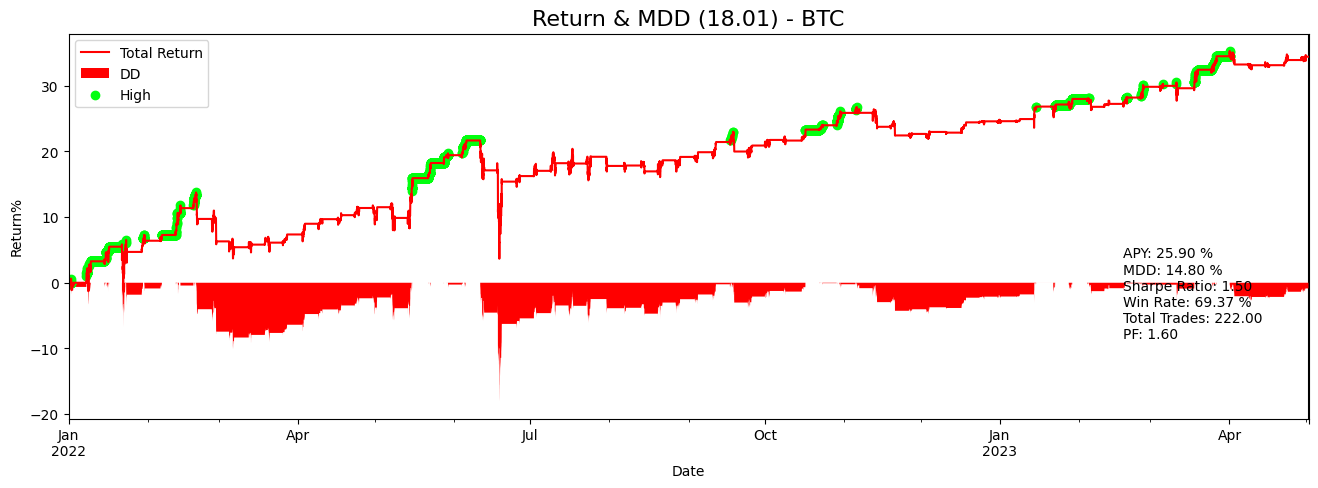

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |      7.35 | 2369.7  | -1634.65 |       1.45 |   71.74 |         46 |
| 2022-06    |      8.89 | 2513.54 | -1624.56 |       1.55 |   70.73 |         41 |
| 2022-09    |      4.57 | 1729.59 | -1272.09 |       1.36 |   57.5  |         40 |
| 2022-12    |      3.78 |  988.09 |  -609.96 |       1.62 |   73.17 |         41 |
| 2023-03    |      9.89 | 1289.1  |  -300.4  |       4.29 |   76.32 |         38 |
| 2023-06    |     -0.07 |  260.83 |  -267.79 |       0.97 |   62.5  |         16 |
+------------+-----------+---------+----------+------------+---------+------------+


In [6]:
all_params = multi_test.multi_params(['BTC'],sample_sets,direction='long')
trades, value_df = multi_test.multi_params_result(all_params)
# multi_test.save_version_result(all_params,value_df,trades,1)